<a href="https://colab.research.google.com/github/Aryamaan777/STD-Drug-Effectiveness/blob/master/STD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input,Dense,Dropout,Flatten
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [0]:
data=pd.read_csv("/content/train.csv")

In [0]:
patient_id=data["patient_id"]
data=data.drop(["patient_id","name_of_drug","review_by_patient","drug_approved_by_UIC"],axis=1)

In [5]:
y_train=data["base_score"]
x_train=data.drop("base_score",axis=1)
x_train.head()

,use_case_for_drug,effectiveness_rating,number_of_times_prescribed
0,Left Ventricular Dysfunction,9,27
1,ADHD,8,192
2,Birth Control,5,17
3,Opiate Dependence,9,37
4,Benign Prostatic Hyperplasia,2,43


In [6]:
le=LabelEncoder()
x_train["use_case_for_drug"]=le.fit_transform(x_train["use_case_for_drug"])
x_train.head()

,use_case_for_drug,effectiveness_rating,number_of_times_prescribed
0,335,9,27
1,39,8,192
2,110,5,17
3,412,9,37
4,105,2,43


In [0]:
"""x_train["number_of_times_prescribed"]=x_train["number_of_times_prescribed"]-x_train["number_of_times_prescribed"].min()
x_train["number_of_times_prescribed"]=x_train["number_of_times_prescribed"]/x_train["number_of_times_prescribed"].max()

x_train["effectiveness_rating"]=x_train["effectiveness_rating"]-x_train["effectiveness_rating"].min()
x_train["effectiveness_rating"]=x_train["effectiveness_rating"]/x_train["effectiveness_rating"].max()
x_train.head()"""

In [7]:
print(x_train.shape)
print(y_train.shape)

(32165, 3)
(32165,)


In [0]:
i=Input(shape=(3,))
x=Dense(512,activation="relu")(i)
x=Dense(256,activation="relu")(x)
x=Dense(128,activation="relu")(x)
x=Dense(64,activation="relu")(x)
x=Dense(32,activation="relu")(x)
x=Dense(1)(x)

model=Model(i,x)

In [0]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2)

In [10]:
model.compile(optimizer="adam",
              loss="mse")

r=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=50)

Epoch 1/50
805/805 [==============================] - 2s 2ms/step - loss: 5.0320 - val_loss: 2.9050
Epoch 2/50
805/805 [==============================] - 2s 2ms/step - loss: 2.4737 - val_loss: 2.2206
Epoch 3/50
805/805 [==============================] - 2s 2ms/step - loss: 2.2301 - val_loss: 2.4525
Epoch 4/50
805/805 [==============================] - 2s 2ms/step - loss: 2.1725 - val_loss: 2.2925
Epoch 5/50
805/805 [==============================] - 2s 2ms/step - loss: 2.1003 - val_loss: 2.1703
Epoch 6/50
805/805 [==============================] - 2s 2ms/step - loss: 2.0219 - val_loss: 2.0069
Epoch 7/50
805/805 [==============================] - 2s 2ms/step - loss: 1.9311 - val_loss: 1.9680
Epoch 8/50
805/805 [==============================] - 2s 2ms/step - loss: 1.8442 - val_loss: 1.6428
Epoch 9/50
805/805 [==============================] - 2s 2ms/step - loss: 1.6652 - val_loss: 1.4244
Epoch 10/50
805/805 [==============================] - 2s 2ms/step - loss: 1.5125 - val_loss: 1.4862

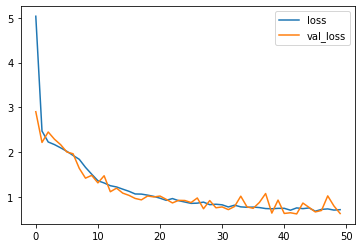

In [11]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()

In [12]:
ck=model.predict(x_val)
print(max(ck))

[9.16604]


In [0]:
i=0
x=[]
for c in y_val:
  if(ck[i]>10):
    ck[i]=10
  x.append((ck[i]-c)**2)
  i+=1

In [14]:
print(max(x))

[12.6261215]


In [0]:
test=pd.read_csv("/content/test.csv")

In [24]:
test.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2


In [0]:
#patient_id2=test["patient_id"]
test=test.drop(["patient_id","name_of_drug","review_by_patient","drug_approved_by_UIC"],axis=1)

In [28]:
test.head()

,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,22,Depression,10
1,35,Weight Loss,9
2,13,Keratosis,4
3,21,Opiate Withdrawal,7
4,44,Insomnia,2


In [29]:
le2=LabelEncoder()
test["use_case_for_drug"]=le2.fit_transform(test["use_case_for_drug"])
test.head()

,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,22,130,10
1,35,441,9
2,13,241,4
3,21,299,7
4,44,231,2


In [0]:
pred=model.predict(test)

In [0]:
classes=np.argmax(pred,axis=1)